In [1]:
import scipy
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
from librosa.core import resample

[[    0     0]
 [    0     0]
 [    0     0]
 ...
 [ -965  -905]
 [-1083  -915]
 [-1327 -1140]]
[-2.7691892e-03  4.4216989e-03 -6.7598419e-03 ... -4.7630747e+03
 -6.7653013e+03 -1.9577927e+03]
[-2.7691892e-03  4.4216989e-03 -6.7598419e-03 ... -4.7630747e+03
 -6.7653013e+03 -1.9577927e+03] 32000
[    0.   500.  1000.  1500.  2000.  2500.  3000.  3500.  4000.  4500.
  5000.  5500.  6000.  6500.  7000.  7500.  8000.  8500.  9000.  9500.
 10000. 10500. 11000. 11500. 12000. 12500. 13000. 13500. 14000. 14500.
 15000. 15500. 16000.] 
 [0.0000000e+00 6.2500000e-04 1.2500000e-03 ... 3.7498750e+01 3.7499375e+01
 3.7500000e+01] 
 [[-1.2130554e-09+0.0000000e+00j  3.1685495e-08+0.0000000e+00j
   1.1303441e-04+0.0000000e+00j ...  5.0603515e-03+0.0000000e+00j
   5.8263023e-03+0.0000000e+00j -1.8280333e-02+0.0000000e+00j]
 [ 1.0514409e-09+9.3277686e-10j -5.0864513e-09+3.1594951e-08j
  -2.2560349e-04-2.2419190e-05j ... -1.8881034e-02+1.3266778e-02j
   9.7473655e-03-1.7503129e-02j  6.7004762e-03+1.44665

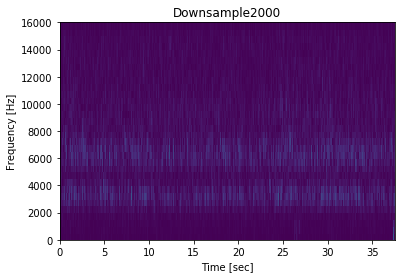

[    0.           0.           0.       ... -6725.3325      32.734356
   948.13934 ]
[    0.           0.           0.       ... -6725.3325      32.734356
   948.13934 ] 32000
[    0.   250.   500.   750.  1000.  1250.  1500.  1750.  2000.  2250.
  2500.  2750.  3000.  3250.  3500.  3750.  4000.  4250.  4500.  4750.
  5000.  5250.  5500.  5750.  6000.  6250.  6500.  6750.  7000.  7250.
  7500.  7750.  8000.  8250.  8500.  8750.  9000.  9250.  9500.  9750.
 10000. 10250. 10500. 10750. 11000. 11250. 11500. 11750. 12000. 12250.
 12500. 12750. 13000. 13250. 13500. 13750. 14000. 14250. 14500. 14750.
 15000. 15250. 15500. 15750. 16000.] 
 [0.000000e+00 1.250000e-03 2.500000e-03 ... 7.499750e+01 7.499875e+01
 7.500000e+01] 
 [[-3.2331522e-14+0.00000000e+00j  3.1356617e-08+0.00000000e+00j
   1.1318440e-04+0.00000000e+00j ...  5.0599389e-03+0.00000000e+00j
   5.9315898e-03+0.00000000e+00j -1.7298507e-02+0.00000000e+00j]
 [ 1.5297227e-14-2.93265947e-14j -3.4025622e-09+3.08062695e-08j
  -2.255813

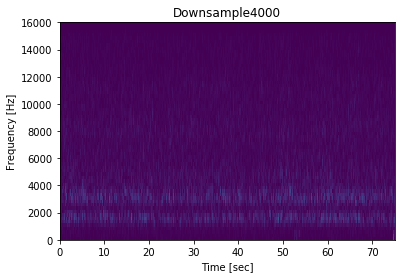

[   0.         0.         0.      ... 1526.7697  1464.0006  -803.37634]
[   0.         0.         0.      ... 1526.7697  1464.0006  -803.37634] 32000
[    0.   125.   250.   375.   500.   625.   750.   875.  1000.  1125.
  1250.  1375.  1500.  1625.  1750.  1875.  2000.  2125.  2250.  2375.
  2500.  2625.  2750.  2875.  3000.  3125.  3250.  3375.  3500.  3625.
  3750.  3875.  4000.  4125.  4250.  4375.  4500.  4625.  4750.  4875.
  5000.  5125.  5250.  5375.  5500.  5625.  5750.  5875.  6000.  6125.
  6250.  6375.  6500.  6625.  6750.  6875.  7000.  7125.  7250.  7375.
  7500.  7625.  7750.  7875.  8000.  8125.  8250.  8375.  8500.  8625.
  8750.  8875.  9000.  9125.  9250.  9375.  9500.  9625.  9750.  9875.
 10000. 10125. 10250. 10375. 10500. 10625. 10750. 10875. 11000. 11125.
 11250. 11375. 11500. 11625. 11750. 11875. 12000. 12125. 12250. 12375.
 12500. 12625. 12750. 12875. 13000. 13125. 13250. 13375. 13500. 13625.
 13750. 13875. 14000. 14125. 14250. 14375. 14500. 14625. 14750. 14875

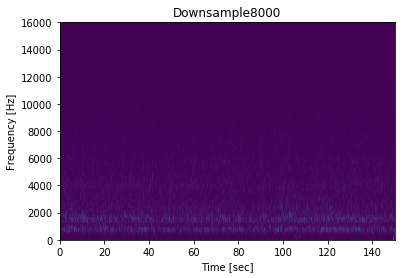

In [2]:
#do stft for the samples when the samples are downsized to 2000hz, 4000hz and 8000hz
#reason for downsizing
frequency = [2000,4000,8000]
powers = [64,128,256]
output = {}
sample_rate, samples = wavfile.read('BeeAudio1.wav')
print(samples)
for i in range(3):
    resampled = resample(samples[:,0].astype(np.float32),sample_rate,frequency[i])
    print(resampled)
    print(resampled,sample_rate)
    samples_casted = resampled / (2.**15)
    f, t, Zxx = signal.stft(samples_casted, fs = sample_rate, nperseg = frequency[i] / 40, noverlap = frequency[i] / 40 * 0.6, nfft = powers[i])
    print(f,'\n', t,'\n',Zxx)
    Zxx_abs = np.abs(Zxx)
    output[str(frequency[i])] = Zxx
    print(type(f), type(t), type(Zxx))
    plt.pcolormesh(t, f, Zxx_abs, vmin = Zxx_abs.min(), vmax = Zxx_abs.max())
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Downsample' + str(frequency[i]))
    plt.show()

In [4]:
print(output['8000'].shape)

(129, 60001)


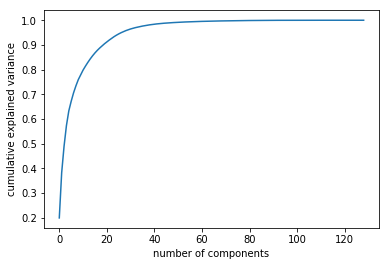

In [5]:
#output the PCA graph to determine the dimension numbers to save
from sklearn.decomposition import PCA
pca = PCA().fit(output['8000'].real)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [6]:
#choose n = 30 for PCA
output_real = np.abs(output['8000'].transpose())
# print(output_real)
pca = PCA(n_components = 30, svd_solver='full')
for_cluster = pca.fit_transform(output_real)
print(for_cluster[0], '\n', for_cluster.shape)
print(sum(pca.explained_variance_ratio_))

[-1.0093256e-01 -3.6427420e-02 -5.6445892e-03 -1.2215055e-02
 -3.7117999e-02 -2.7588889e-02 -9.6434299e-03 -2.6645254e-02
  9.8579777e-03  1.1160198e-02 -3.2687495e-03 -5.7621412e-03
  1.7391141e-05 -7.9954397e-03  3.7961302e-03  3.5998167e-03
  3.3760280e-03 -5.6334608e-03 -1.9125846e-03  1.6565018e-03
 -2.6202959e-04 -9.7205210e-04 -2.9884034e-04 -2.8886443e-03
 -4.2874613e-04 -3.1972947e-03  1.5438763e-04 -2.5169668e-03
  9.9240732e-04 -2.3634974e-03] 
 (60001, 30)
0.9521622133906931


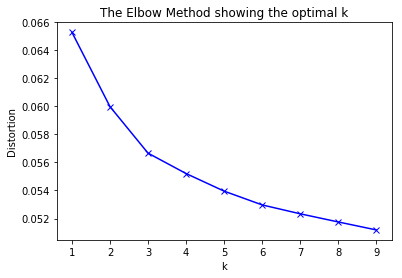

In [7]:
#elbow method to determine the optimal n_cluster for k-means cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(for_cluster)
    kmeanModel.fit(for_cluster)
    distortions.append(sum(np.min(cdist(for_cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / for_cluster.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(for_cluster)
print(kmeans.transform(for_cluster).shape)

(60001, 3)


In [9]:
labels_k = kmeans.labels_
print(labels_k, '\n', len(labels_k), '\n', kmeans.cluster_centers_)
centers = kmeans.cluster_centers_
# window_collection = {0:[[],[]], 1:[[],[]], 2:[[],[]]}
# for window_count in range(60001):
#     window_collection[labels_k[window_count]][0].append(for_cluster[window_count])
#     window_collection[labels_k[window_count]][1].append(window_count)
# print(len(window_collection[2][1]),window_collection[2][1][0])
indices = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
points = {i: for_cluster[np.where(kmeans.labels_ == i)] for i in range(kmeans.n_clusters)}
min_indices = {}
for i in range(kmeans.n_clusters):
    distances = [np.linalg.norm(a-centers[i]) for a in points[i]]
    min_indices[i] = distances.index(min(distances))
print(indices, '\n', points,'\n',min_indices)

[2 2 2 ... 2 0 2] 
 60001 
 [[ 3.87626067e-02 -2.27926131e-02 -3.33600678e-04  1.36535513e-04
   3.24939552e-04 -1.50089909e-04 -7.00770834e-05 -2.28984631e-04
  -1.17919742e-04 -4.63837678e-05  1.46619583e-04  1.22789934e-04
  -8.78534265e-05  1.90133960e-05 -3.52419629e-05 -1.16670981e-05
  -8.97555074e-05 -2.69920529e-05 -3.00628762e-05  5.25850919e-06
   8.29897203e-07 -8.82949917e-06  1.51338518e-05  7.01575773e-05
   8.52165613e-06  3.15802339e-07 -2.25950917e-05 -4.98904446e-05
   3.73146686e-05  1.31594140e-06]
 [ 1.15287649e-02  3.75674218e-02 -4.50355670e-04 -6.01518492e-04
  -3.13025899e-04  2.10232698e-04 -7.38253220e-05  1.55423040e-04
  -3.25240471e-05  6.65494226e-05 -2.03267584e-04  2.92557452e-05
   6.68483426e-06 -1.41215305e-05  1.62725726e-07 -1.88661925e-05
   1.48657784e-06 -2.59082317e-05  8.07344477e-05 -5.51984594e-05
   8.93497054e-06  2.91345841e-05 -7.58215683e-05 -3.57837803e-06
   1.36013559e-05  4.39173600e-05  2.14944230e-05  1.38132154e-05
  -2.17635152

In [10]:
import collections
print(labels_k,labels_k.shape)
collections_k = collections.Counter(labels_k)
print(collections_k)

[2 2 2 ... 2 0 2] (60001,)
Counter({2: 30550, 1: 14858, 0: 14593})


In [11]:
#generate markov chain model
matrix = [[0,0,0],
          [0,0,0],
          [0,0,0],]
for i in range(len(labels_k)-1):
    matrix[labels_k[i]][labels_k[i+1]] += 1
    matrix_og = matrix[:]
for j in range(3):
    matrix[j] = [x / collections_k[j] for x in matrix_og[j]]
print(matrix_og, '\n', matrix)

[[6462, 3218, 4913], [3183, 5585, 6090], [4948, 6055, 19546]] 
 [[0.44281504831083396, 0.22051668608236827, 0.3366682656067978], [0.21422802530623233, 0.3758917754744919, 0.4098801992192758], [0.16196399345335516, 0.1981996726677578, 0.6398036006546645]]


In [12]:
#generate markov chain for 30 seconds
markov_generated = [2] + [0] * 2999
for i in range(len(markov_generated)):
    if i < 2999:
        next_element = 2
        reference_array  = matrix[markov_generated[i]]
        random_var = np.random.random_sample()
        if random_var < reference_array[0]:
            next_element = 0
        elif random_var < reference_array[0] + reference_array[1]:
            next_element = 1
        markov_generated[i+1] = next_element
print(len(markov_generated))

3000


In [13]:
print(output['8000'].transpose()[0][:].shape)

(129,)


In [15]:
indices_sec = {0: 4912, 1: 10074, 2: 16247}
windows_generated = []
windows_generated_ifft = []
output_t = output['8000'].transpose()
print(output_t.shape)
for i in range(3000):
    windows_generated.append(output_t[indices_sec[markov_generated[i]]][:])
    windows_generated_ifft.append(np.fft.ifft(windows_generated[i]))
print(windows_generated_ifft[0],'\n',windows_generated_ifft[1],'\n',windows_generated_ifft[0].shape)

(60001, 129)
[ 1.09499570e-05-8.0109048e-06j  9.89837099e-06-8.6088858e-06j
  9.02042939e-06-1.1200302e-05j  5.83022347e-06-1.8474782e-05j
  1.63204095e-05-3.3720491e-05j  4.89220729e-05-1.9911417e-05j
  5.29196113e-05-1.0050718e-05j  8.19849010e-05+4.9341674e-05j
 -9.51164839e-06+9.8466669e-05j -7.67763704e-05+5.2114083e-05j
 -1.25117833e-04-2.0109197e-05j -1.43031153e-04-7.8808371e-05j
 -7.38830204e-05-1.7337415e-04j -1.77373495e-05-1.6247024e-04j
  1.21827536e-04-2.4898181e-04j  3.02447443e-04-2.4805800e-04j
  4.34601272e-04+6.5062050e-06j  2.78253981e-04+3.3641554e-04j
 -1.72060245e-04+2.6337369e-04j -2.60169181e-04-1.7778269e-05j
 -5.33598468e-05-2.4876272e-04j  1.16297269e-04-2.9132210e-04j
  4.44476929e-04-1.9607710e-04j  5.06677665e-04-9.8504188e-06j
  3.66781460e-04+5.6150751e-05j  8.13146471e-04+2.0575315e-04j
  8.88969633e-04+1.0388627e-03j  5.74531005e-05+1.5412690e-03j
 -8.64989299e-04+1.7792369e-03j -1.72469893e-03+7.9172727e-04j
 -1.81066489e-03-3.3414335e-04j -1.3885463

[0 0]
